In [2]:
# Insatllation des packages
! pip install scikit-learn
! pip install xgboost
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
# Import des librairies
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Initialisation des variables d'environnement
plumnet_random_state=0

In [4]:
!pwd

/Users/pauljonquet/Documents/Artefact/plumeNet/src/models/CNN


In [5]:
# Chargement des données
# data_dir = 'french_bird_db'
dataset = 'french_bird_db_25_50'
dir_path = os.path.join('.', dataset)
print(dir_path)

./french_bird_db_25_50


./french_bird_db_25_50/anthus_trivialis/anthus_trivialis_0.jpg


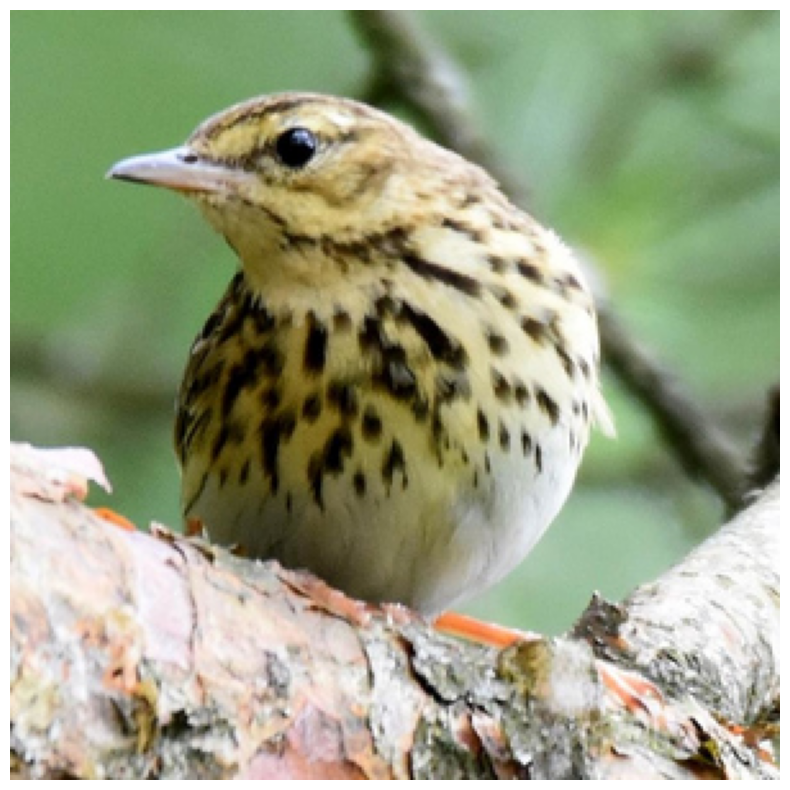

In [6]:
# Image de test
espece = 'anthus_trivialis'
image_test = 'anthus_trivialis_0.jpg'
file_path = os.path.join(dir_path, espece, image_test)
print(file_path)

img = plt.imread(file_path)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
plt.show()

In [7]:
import os
import pandas as pd
from pathlib import Path

def create_database_df(dataset_folder: str) -> 'DataFrame':

    """
    This function takes a bird database folder (unzipped) and generate a dataframe with two columns:
    - image_path
    - species
    """

    data_lst = []

    species_folders = os.listdir(dataset_folder)

    for folder in species_folders: 
        for image_file in Path(os.path.join(dataset_folder,folder)).glob("*.jpg"):
            row = {
                'img_path':image_file,
                'species':os.path.basename(image_file).rsplit('_', 1)[0]
            }
            data_lst.append(row)

    return pd.DataFrame(data_lst)

In [9]:
repertoires = [nom for nom in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, nom))]
repertoires = sorted(repertoires)

liste_images = []
liste_especes = []
X_constr = []
y_constr = []

espece_id = 0

max_images = 50
print(repertoires)
# Récupération du nom des images
for repertoire in repertoires :
    nb_images = 0
    
    liste_especes.append({'nom' : repertoire, 'id' : espece_id})
    dir_espece = os.path.join(dir_path, repertoire)
    
    for fichier in os.listdir(dir_espece) :
        if nb_images < max_images :
            #print(fichier)
            nom_fichier = os.path.join(dir_espece, fichier)
            img = plt.imread(nom_fichier)
            img = img.reshape(-1)
            #print(img.shape[0])
            if (img.shape[0] == 300*300*3) :
                X_constr.append(img)
                y_constr.append(espece_id)
                nb_images += 1
    espece_id += 1
liste_especes = pd.DataFrame(liste_especes)

['anthus_trivialis', 'aquila_pennatus', 'ardenna_tenuirostris', 'ardeola_ralloides', 'carpodacus_erythrinus', 'charadrius_leschenaultii', 'coracias_garrulus', 'crex_crex', 'emberiza_caesia', 'emberiza_rutila', 'galerida_theklae', 'ichthyaetus_ichthyaetus', 'montifringilla_nivalis', 'passer_domesticus', 'passer_italiae', 'periparus_ater', 'phylloscopus_coronatus', 'pluvialis_fulva', 'podiceps_cristatus', 'ptyonoprogne_rupestris', 'recurvirostra_avosetta', 'somateria_spectabilis', 'streptopelia_decaocto', 'tringa_nebularia', 'turdus_eunomus']


In [10]:
y = pd.DataFrame(y_constr)
print(y.shape)
X = np.vstack(X_constr)
X = pd.DataFrame(X)
print(X.shape)

(1246, 1)
(1246, 270000)


In [ ]:
# Préparation des données - normalisation
print('Max =', X.values.max())

for ligne in range(len(X)) :
    X[ligne] = np.float16(X[ligne]/255)

In [ ]:
y_shaped = np.array(y).reshape(y.shape[0])
y_shaped.shape

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_shaped, test_size=0.2, shuffle=True, random_state=plumnet_random_state)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# Réduction de dimensions

pca = PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)